In [59]:
from itertools import count
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from scipy.optimize import curve_fit
from lab_lib import *

In [60]:
"""
I
"""

U_term = [(37.56, 0.01), (37.72, 0.01), (37.85, 0.01), (38.02, 0.01)]
T_acht = [(952, 1), (962, 1), (960, 1), (970, 1)]

k_term = 0.041 #uV/C

T_term = [countWithSigma(u[0]/k_term + 20, [u]) for u in U_term]
T_Delta = [((1 - T_term[i][0] / T_acht[i][0])*100, np.sqrt((100*T_term[i][1]/T_acht[i][0])**2 + (100*T_term[i][0]*T_acht[i][1]/T_acht[i][0]**2)**2)) for i in range(len(U_term))]

table_acht = [[r"T_{термопара}, C^o", r"T_{пирометр}, C^o", r"\Delta, %"]]
for i in range(len(T_term)):
    table_acht.append([texAns(T_term[i]), texAns(T_acht[i]), texAns(T_Delta[i])])

texTable(table_acht)



\begin{table}[!ht]
    \centering
    \begin{tabular}{|c|c|c|}
        \hline

        T_{термопара}, C^o & T_{пирометр}, C^o & \Delta, %\\ \hline
        $936.1 \pm 0.2$ & $952.0 \pm 1.0$ & $1.67 \pm 0.11$\\ \hline
        $940.0 \pm 0.2$ & $962.0 \pm 1.0$ & $2.29 \pm 0.10$\\ \hline
        $943.2 \pm 0.2$ & $960.0 \pm 1.0$ & $1.75 \pm 0.11$\\ \hline
        $947.3 \pm 0.2$ & $970.0 \pm 1.0$ & $2.34 \pm 0.10$\\ \hline

    \end{tabular}
    \caption{}
    \label{}
\end{table}



In [61]:
"""
II
"""

T_ring_left =  765
T_ring_right = 775

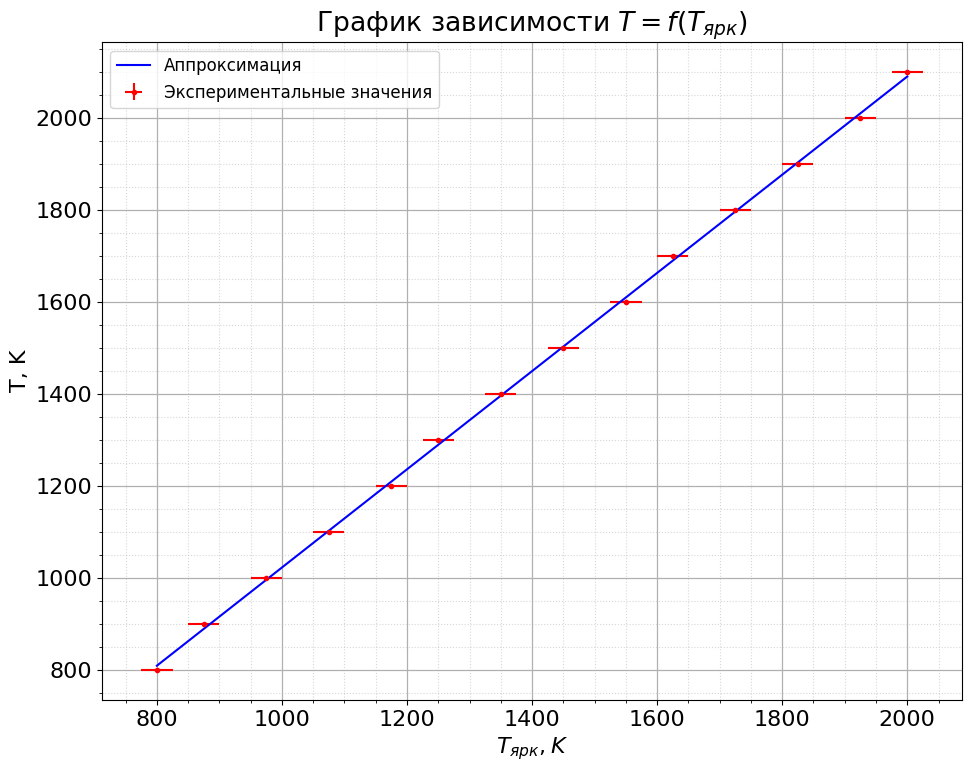

T_bright_table
$k = $ $1.068 \pm 0.006$
$b = $ $-45 \pm 9$


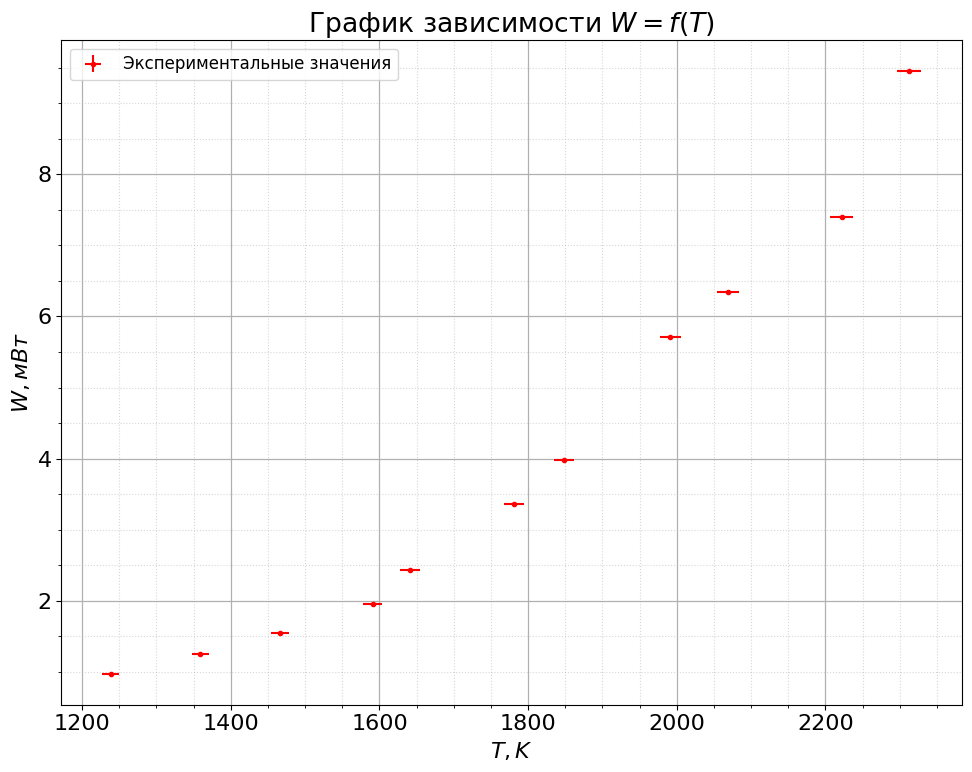



\begin{table}[!ht]
    \centering
    \begin{tabular}{|c|c|}
        \hline

        $T,K$ & $\epsilon_T$\\ \hline
        $800$ & $0.067$\\ \hline
        $900$ & $0.081$\\ \hline
        $1000$ & $0.105$\\ \hline
        $1100$ & $0.119$\\ \hline
        $1200$ & $0.133$\\ \hline
        $1300$ & $0.144$\\ \hline
        $1400$ & $0.164$\\ \hline
        $1500$ & $0.179$\\ \hline
        $1600$ & $0.195$\\ \hline
        $1700$ & $0.209$\\ \hline
        $1800$ & $0.223$\\ \hline
        $1900$ & $0.236$\\ \hline
        $2000$ & $0.249$\\ \hline

    \end{tabular}
    \caption{}
    \label{}
\end{table}



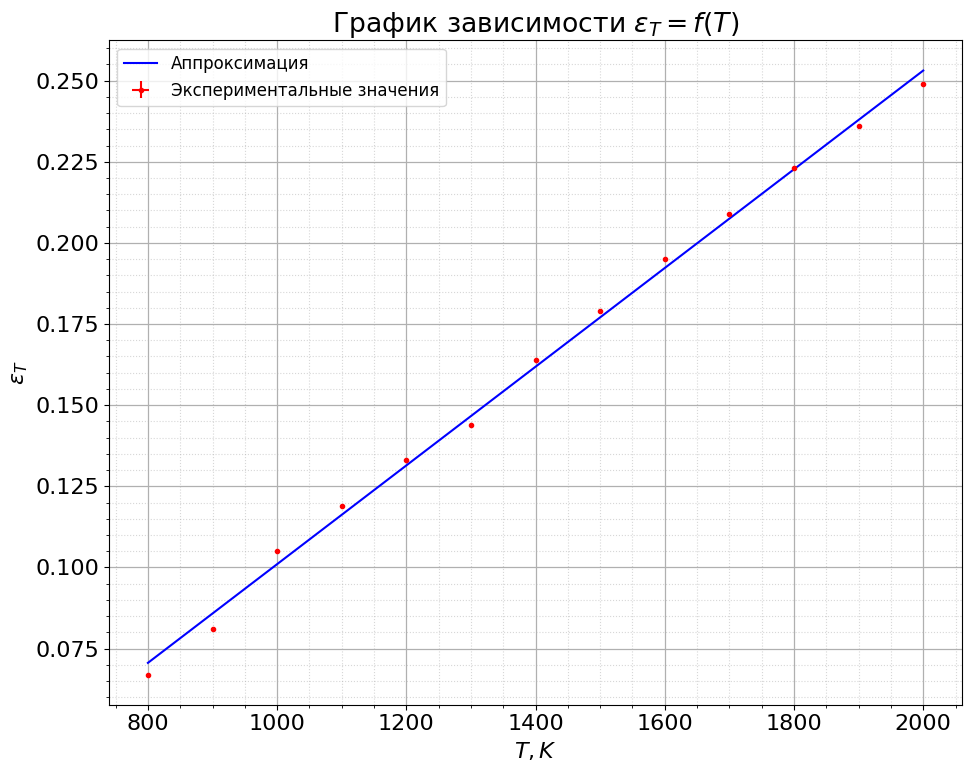

Eps_T
$k = $ $0.000152 \pm 0.000002$
$b = $ $-0.051 \pm 0.003$
k: (3.0418735477200585 +- 0.005179624568515642)


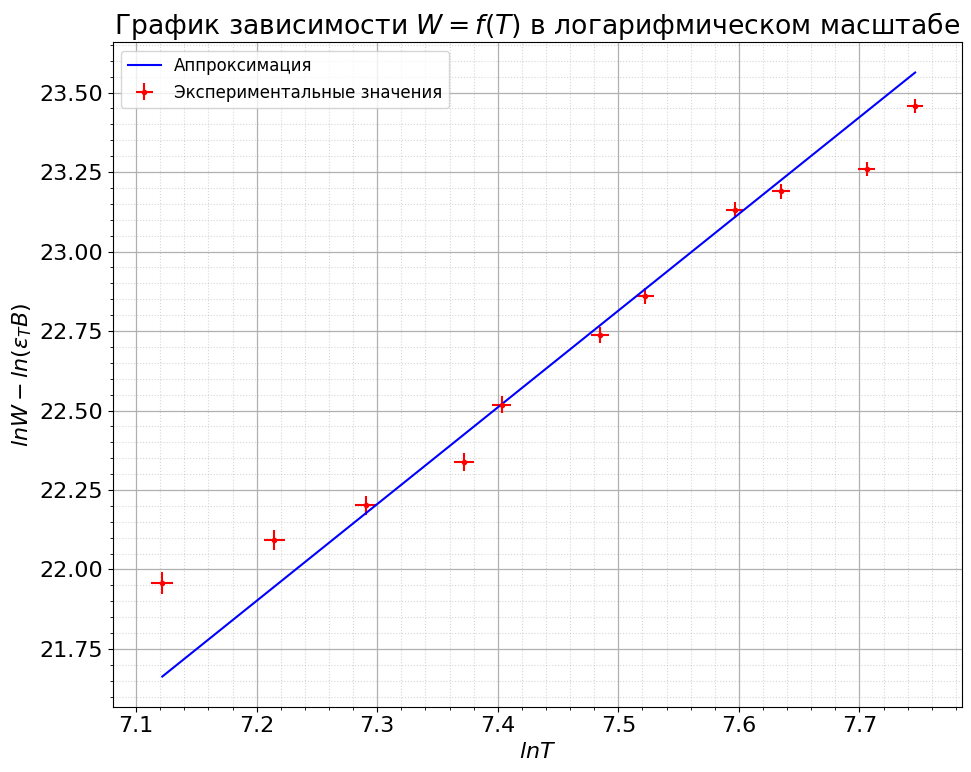

$n = $ $3.042 \pm 0.005$


\begin{table}[!ht]
    \centering
    \begin{tabular}{|c|c|c|}
        \hline

        $T, K$ & $\sigma*10^{-12}, \frac{Вт}{см^2 \cdot K^4}$ & $h*10^{-34}, Дж \cdot с$\\ \hline
        $1780 \pm 10$ & $4.2 \pm 0.1$ & $7.3 \pm 0.2$\\ \hline
        $1850 \pm 10$ & $4.12 \pm 0.13$ & $7.4 \pm 0.2$\\ \hline
        $1990 \pm 10$ & $4.00 \pm 0.12$ & $7.4 \pm 0.2$\\ \hline
        $2070 \pm 10$ & $3.64 \pm 0.11$ & $7.7 \pm 0.2$\\ \hline
        $2220 \pm 20$ & $2.94 \pm 0.08$ & $8.2 \pm 0.2$\\ \hline
        $2310 \pm 20$ & $3.05 \pm 0.08$ & $8.1 \pm 0.2$\\ \hline

    \end{tabular}
    \caption{}
    \label{}
\end{table}

$<\sigma> = $ $3.7 \pm 0.3$
$<h> = $ $7.7 \pm 0.3$


In [113]:
"""
III
"""

T_bright = [800, 875, 975, 1075, 1175, 1250, 1350, 1450, 1550, 1625, 1725, 1825, 1925, 2000]
T_abs    = range(800, 2200, 100)

T_br_T_k, T_br_T_b = make_mnk("img/T_bright_table.png", "График зависимости $T = f(T_{ярк})$", "$T_{ярк}, K$", "T, K", T_bright, T_abs, dx=[25]*len(T_abs), dy=[0]*len(T_abs))

print("T_bright_table")
print("$k = $", texAns(T_br_T_k))
print("$b = $", texAns(T_br_T_b))

I_bulb = [0.529, 0.569, 0.604, 0.649, 0.694, 0.768, 0.811, 0.913, 0.945, 0.995, 1.080] # mA
U_bulb = [1.823, 2.196, 2.550, 3.015, 3.515, 4.375, 4.905, 6.250, 6.709, 7.433, 8.750] # V
T_bulb_ = [929,    1042,  1142,  1259,  1306,  1437,  1500,  1634,  1707,  1850,  1935] # C
T_bulb_ = [i + 273 for i in T_bulb_] # K

T_bulb = [(T_br_T_k[0] * t + T_br_T_b[0], np.sqrt((T_br_T_k[0]*1)**2 + (T_br_T_k[1]*t)**2 + T_br_T_b[1]**2)) for t in T_bulb_]

W_bulb = [countWithSigma(I_bulb[i]*U_bulb[i], [(I_bulb[i], 0.001), (U_bulb[i], 0.001)]) for i in range(len(I_bulb))]

make_plot_no_mnk("img/W_T.png", "График зависимости $W = f(T)$", "$T, K$", "$W, мВт$", x=[t[0] for t in T_bulb], y=[w[0] for w in W_bulb], dx=[t[1] for t in T_bulb], dy=[w[1] for w in W_bulb])


T_eps = range(800, 2100, 100)
Eps_T = [0.067, 0.081, 0.105, 0.119, 0.133, 0.144, 0.164, 0.179, 0.195, 0.209, 0.223, 0.236, 0.249]

eps_table = [[r"$T,K$", r"$\epsilon_T$"]]
for i in range(len(T_eps)):
    eps_table.append([f"${str(T_eps[i])}$", f"${str(Eps_T[i])}$"])

texTable(eps_table)

Eps_T_k, Eps_T_b = make_mnk("img/eps_T.png", r"График зависимости $\epsilon_{T} = f(T)$", r"$T,K$", r"$\epsilon_T$", x=T_eps, y=Eps_T, dx=[0]*len(T_eps), dy=[0]*len(T_eps))

print("Eps_T")
print("$k = $", texAns(Eps_T_k))
print("$b = $", texAns(Eps_T_b))

def get_Eps_T(T):
    return (Eps_T_k[0] * T[0] + Eps_T_b[0], np.sqrt((Eps_T_k[0]*T[1])**2 + (Eps_T_k[1]*T[0])**2 + Eps_T_b[1]**2))

x = [np.log(T_bulb[i][0]) for i in range(len(T_bulb))]
dx = [T_bulb[i][1]/T_bulb[i][0] for i in range(len(T_bulb))]
y = [np.log(W_bulb[i][0]/1000 / (get_Eps_T(T_bulb[i])[0] * 0.36 * 5.67 * 10**-12)) for i in range(len(W_bulb))]
dy = [np.sqrt((W_bulb[i][1]/W_bulb[i][0])**2 + (get_Eps_T(T_bulb[i])[1]/get_Eps_T(T_bulb[i])[0])**2) for i in range(len(W_bulb))]

n = make_mnk_direct_prop("img/ln_W_ln_T.png", r"График зависимости $W = f(T)$ в логарифмическом масштабе", r"$lnT$", r"$lnW - ln(\varepsilon_T B)$", x=x, y=y, dx=dx, dy=dy)

print("$n = $", texAns(n))

sigma = []
sigma_T = []
for i in range(len(T_bulb)):
    if T_bulb[i][0] < 1700:
        continue

    sigma_T.append(T_bulb[i])

    val = W_bulb[i][0] / (get_Eps_T(T_bulb[i])[0] * 0.36 * T_bulb[i][0]**4)
    inacc = np.sqrt((W_bulb[i][1] / (get_Eps_T(T_bulb[i])[0] * 0.36 * T_bulb[i][0]**4))**2 + (get_Eps_T(T_bulb[i])[1] / (get_Eps_T(T_bulb[i])[0]**2 * 0.36 * T_bulb[i][0]**4))**2 + (W_bulb[i][0] * 4 * T_bulb[i][1] / (get_Eps_T(T_bulb[i])[0] * 0.36 * T_bulb[i][0]**5))**2)
    sigma.append((val, inacc))

k_b = 1.38 * 10**-23
c = 3 * 10**10
h = []
for i in range(len(sigma)):
    val = np.cbrt(2*np.pi**5*k_b**4/(15*c**2*sigma[i][0]))
    inacc = sigma[i][1] * np.cbrt(2*np.pi**5*k_b**4/(15*c**2*sigma[i][0]))/sigma[i][0]
    h.append((val, inacc))

sigma_table = [[r"$T, K$", r"$\sigma*10^{-12}, \frac{Вт}{см^2 \cdot K^4}$", r"$h*10^{-34}, Дж \cdot с$"]] 
for i in range(len(sigma)):
    sigma_table.append([texAns(sigma_T[i]), texAns(tuple(j * 10**12 for j in sigma[i])), texAns(tuple(j * 10**34 for j in h[i]))])

texTable(sigma_table)

mean_sigma = meanWithInacc(sigma)
mean_h = meanWithInacc(h)

print(r"$<\sigma> = $", texAns(tuple(j * 10**12 for j in mean_sigma)))
print(r"$<h> = $", texAns(tuple(j * 10**34 for j in mean_h)))

In [116]:
res_table = [[r"$U,В$", r"$I,мА$", r"$W,мВт$", r"$T_{ярк}, K$", r"$T, K$", r"$\varepsilon_T$"]]
for i in range(len(U_bulb)):
    res = []
    res.append(texAns((U_bulb[i], 0.001)))
    res.append(texAns((I_bulb[i], 0.001)))
    res.append(texAns(W_bulb[i]))
    res.append(texAns((T_bulb_[i], 1)))
    res.append(texAns(T_bulb[i]))
    res.append(texAns(get_Eps_T(T_bulb[i])))
    res_table.append(res)

texTable(res_table)



\begin{table}[!ht]
    \centering
    \begin{tabular}{|c|c|c|c|c|c|}
        \hline

        $U,В$ & $I,мА$ & $W,мВт$ & $T_{ярк}, K$ & $T, K$ & $\varepsilon_T$\\ \hline
        $1.8230 \pm 0.0010$ & $0.5290 \pm 0.0010$ & $0.964 \pm 0.002$ & $1202.0 \pm 1.0$ & $1240 \pm 10$ & $0.137 \pm 0.005$\\ \hline
        $2.1960 \pm 0.0010$ & $0.5690 \pm 0.0010$ & $1.250 \pm 0.002$ & $1315.0 \pm 1.0$ & $1360 \pm 10$ & $0.156 \pm 0.005$\\ \hline
        $2.5500 \pm 0.0010$ & $0.6040 \pm 0.0010$ & $1.540 \pm 0.003$ & $1415.0 \pm 1.0$ & $1470 \pm 10$ & $0.172 \pm 0.005$\\ \hline
        $3.0150 \pm 0.0010$ & $0.6490 \pm 0.0010$ & $1.957 \pm 0.003$ & $1532.0 \pm 1.0$ & $1590 \pm 10$ & $0.191 \pm 0.005$\\ \hline
        $3.5150 \pm 0.0010$ & $0.6940 \pm 0.0010$ & $2.439 \pm 0.004$ & $1579.0 \pm 1.0$ & $1640 \pm 10$ & $0.199 \pm 0.005$\\ \hline
        $4.3750 \pm 0.0010$ & $0.7680 \pm 0.0010$ & $3.360 \pm 0.004$ & $1710.0 \pm 1.0$ & $1780 \pm 10$ & $0.220 \pm 0.006$\\ \hline
        $4.9050 \pm 0.001

In [ ]:
"""
IV
"""

T_neon = 819